In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import re

In [4]:
futbol = pd.read_csv("futbol_clean.csv", index_col=0, encoding = "ISO-8859-1")

In [5]:
futbol.head(5)

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,player_positions,preferred_foot,international_reputation,release_clause_eur,team_jersey_number,contract_valid_until
sofifa_id,,,,,,,,,,,,,,,
158023,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,"RW, CF, ST",Left,5,195800000.0,10.0,2021.0
20801,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,"ST, LW",Right,5,96500000.0,7.0,2022.0
190871,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,"LW, CAM",Right,5,195200000.0,10.0,2022.0
200389,J. Oblak,26,188,87,Slovenia,AtlÃÂ©tico Madrid,91,93,77500000,GK,Right,3,164700000.0,13.0,2023.0
183277,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,"LW, CF",Right,4,184500000.0,7.0,2024.0


# Estadísticas preliminares

### Media de edad de los jugadores en el FIFA 2020

In [6]:
mean_age = futbol['age'].mean()
mean_age

25.283291388554545

### Media de altura de los jugadores en el FIFA 2020 (cm)

In [7]:
mean_height_cm = futbol['height_cm'].mean()
mean_height_cm

181.36218404639456

### Media de peso de los jugadores en el FIFA 2020 (kg)

In [8]:
mean_weight_kg = futbol['weight_kg'].mean()
mean_weight_kg

75.2763431447642

### Puntuacion máxima que puede alcanzar un jugador en el FIFA en cuanto a valoración (overall)

In [9]:
max_value_overall=futbol['overall'].max()
max_value_overall

94

### Puntuacion mínima que puede alcanzar un jugador en el FIFA en cuanto a valoración (overall)

In [10]:
min_value_overall=futbol['overall'].min()
min_value_overall

48

### Jugador mejor valorado en el FIFA 2020

In [11]:
futbol.iloc[0]


short_name                      L. Messi
age                                   32
height_cm                            170
weight_kg                             72
nationality                    Argentina
club                        FC Barcelona
overall                               94
potential                             94
value_eur                       95500000
player_positions              RW, CF, ST
preferred_foot                      Left
international_reputation               5
release_clause_eur             1.958e+08
team_jersey_number                    10
contract_valid_until                2021
Name: 158023, dtype: object

### Jugador peor valorado

In [12]:
#a través de shape miramos la última fila de nuestro Data Set.
futbol.shape

(18278, 15)

In [13]:
futbol.iloc[18277]

short_name                              Pan Ximing
age                                             26
height_cm                                      182
weight_kg                                       78
nationality                               China PR
club                        Hebei China Fortune FC
overall                                         48
potential                                       51
value_eur                                    40000
player_positions                                CM
preferred_foot                               Right
international_reputation                         1
release_clause_eur                             NaN
team_jersey_number                              37
contract_valid_until                          2019
Name: 233449, dtype: object

### Top 10 jugadores más valorados (overall)

In [14]:
top_10_overall = futbol[futbol["overall"] >= 90]
top_10_overall.head(10)

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,player_positions,preferred_foot,international_reputation,release_clause_eur,team_jersey_number,contract_valid_until
sofifa_id,,,,,,,,,,,,,,,
158023,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,"RW, CF, ST",Left,5,195800000.0,10.0,2021.0
20801,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,"ST, LW",Right,5,96500000.0,7.0,2022.0
190871,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,"LW, CAM",Right,5,195200000.0,10.0,2022.0
200389,J. Oblak,26,188,87,Slovenia,AtlÃÂ©tico Madrid,91,93,77500000,GK,Right,3,164700000.0,13.0,2023.0
183277,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,"LW, CF",Right,4,184500000.0,7.0,2024.0
192985,K. De Bruyne,28,181,70,Belgium,Manchester City,91,91,90000000,"CAM, CM",Right,4,166500000.0,17.0,2023.0
192448,M. ter Stegen,27,187,85,Germany,FC Barcelona,90,93,67500000,GK,Right,3,143400000.0,1.0,2022.0
203376,V. van Dijk,27,193,92,Netherlands,Liverpool,90,91,78000000,CB,Right,3,150200000.0,4.0,2023.0
177003,L. ModriÃÂ,33,172,66,Croatia,Real Madrid,90,90,45000000,CM,Right,4,92300000.0,10.0,2020.0


/Users/borjadelrio/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 132 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/borjadelrio/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 135 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/borjadelrio/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 132 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/borjadelrio/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 135 missing from current font.
  font.set_text(s, 0, flags=flags)


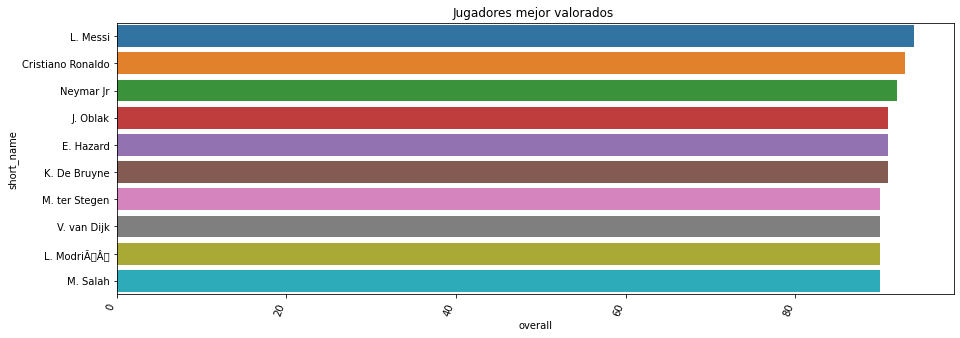

In [15]:
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x="overall", y="short_name", data=top_10_overall, ax=ax)
plt.xticks(rotation=70, ha='right')
plt.title("Jugadores mejor valorados ")
plt.show()

### Top 10 jugadores peor valorados

In [16]:
worst_10_overall = futbol[futbol["overall"] <= 48]
worst=worst_10_overall.head(10)

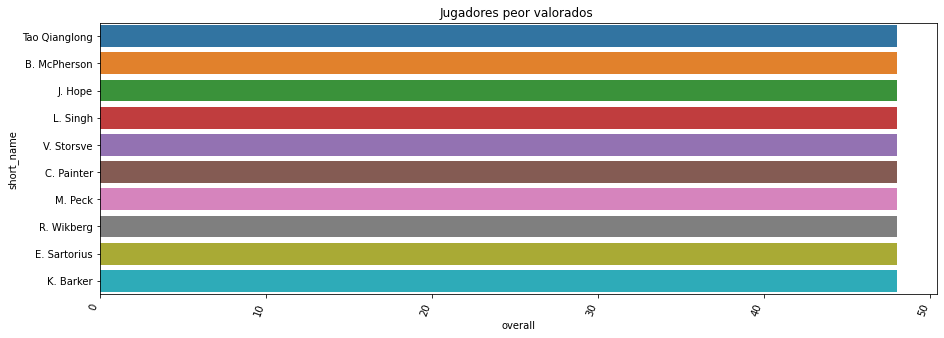

In [59]:
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x="overall", y="short_name", data=worst, ax=ax)
plt.xticks(rotation=70, ha='right')
plt.title("Jugadores peor valorados ")
plt.show()

### Análisis por nacionalidad

In [39]:
nacionalidad_peor_valorados=futbol[(futbol["overall"] <= 48) & (futbol["nationality"])]
nacionalidad_peor_valorados

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,player_positions,preferred_foot,international_reputation,release_clause_eur,team_jersey_number,contract_valid_until
sofifa_id,,,,,,,,,,,,,,,
248376,Tao Qianglong,17,172,65,China PR,Hebei China Fortune FC,48,73,60000,"RM, LM",Right,1,153000.0,29.0,2023.0
252890,B. McPherson,17,178,75,England,Grimsby Town,48,73,60000,RM,Right,1,165000.0,27.0,2023.0
252891,J. Hope,17,178,75,England,Grimsby Town,48,72,60000,LB,Left,1,165000.0,28.0,2023.0
247201,L. Singh,17,184,72,Canada,BrÃÂ¸ndby IF,48,70,60000,"CB, LB",Left,1,135000.0,25.0,2022.0
252151,V. Storsve,17,185,65,Norway,LillestrÃÂ¸m SK,48,70,50000,GK,Right,1,113000.0,41.0,2023.0
252893,C. Painter,17,183,75,England,Grimsby Town,48,69,60000,CDM,Right,1,165000.0,30.0,2023.0
251310,M. Peck,18,175,66,England,Plymouth Argyle,48,68,60000,"CDM, CB",Right,1,165000.0,26.0,2021.0
246410,R. Wikberg,16,186,72,Sweden,ÃÂstersunds FK,48,67,50000,"CB, CDM",Right,1,94000.0,36.0,2021.0
247100,E. Sartorius,16,174,69,England,Lincoln City,48,67,60000,ST,Right,1,143000.0,30.0,2022.0


In [48]:
# lo agrupamos en una variable y vemos qué países tienen los peores jugadores
pais=nacionalidad_peor_valorados["nationality"].value_counts()
pais

England                13
China PR               11
Republic of Ireland     6
Sweden                  2
Denmark                 1
Mexico                  1
Japan                   1
Italy                   1
Cyprus                  1
Canada                  1
Finland                 1
Turkey                  1
Norway                  1
Wales                   1
Korea Republic          1
Name: nationality, dtype: int64

### Hacemos la representación gráfica por agrupación por países

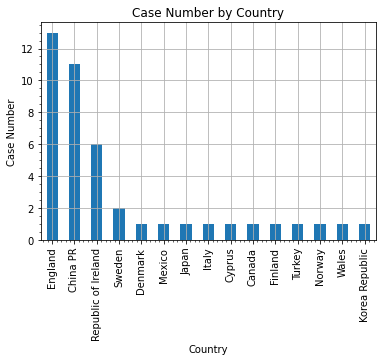

In [36]:
pais.plot(kind="bar")
plt.xlabel('Country') 
plt.ylabel('Case Number') 
plt.title('Case Number by Country') 
plt.minorticks_on() 
plt.grid()

### Analizamos como están distribuidas en la media del FIFA 20 las puntuaciones overall

In [15]:
#vemos que los valores que más se repiten están entre los valores 64 y 68
distribucion_overall= futbol.overall.value_counts()
distribucion_overall

66    1141
64    1138
65    1124
68    1068
67    1065
69     964
63     946
70     902
62     873
72     753
71     715
60     701
61     649
73     638
59     545
74     529
75     506
58     485
76     361
57     360
56     360
55     274
77     262
78     239
54     232
53     197
79     185
52     169
80     157
51     117
50     103
82      92
81      82
83      80
49      66
84      49
48      43
85      35
86      18
88      17
87      15
89      13
90       4
91       3
92       1
93       1
94       1
Name: overall, dtype: int64

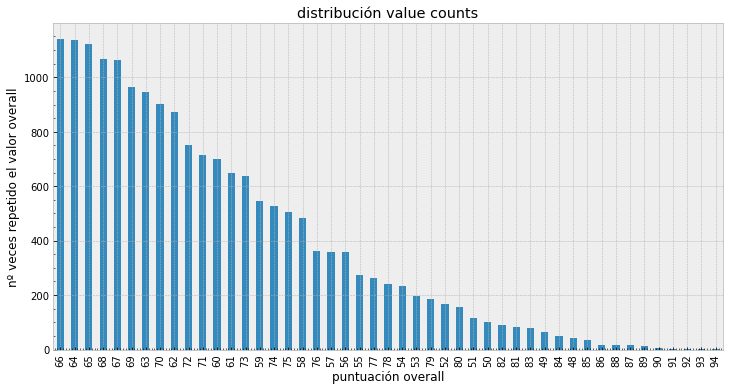

In [16]:
plt.style.use('bmh')
plt.figure(figsize=(12,6))
distribucion_overall.plot(kind="bar")
plt.xlabel('puntuación overall') 
plt.ylabel('nº veces repetido el valor overall') 
plt.title('distribución value counts') 
plt.minorticks_on() 
plt.show()

### Miramos por valor de mercado ( top 10 )

In [68]:
top_value=top_internacional.sort_values(by=['value_eur'], ascending=False)
top_value.head(10)

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,player_positions,preferred_foot,international_reputation,release_clause_eur,team_jersey_number,contract_valid_until
sofifa_id,,,,,,,,,,,,,,,
190871,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,"LW, CAM",Right,5,195200000.0,10.0,2022.0
158023,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,"RW, CF, ST",Left,5,195800000.0,10.0,2021.0
231747,K. MbappÃÂ©,20,178,73,France,Paris Saint-Germain,89,95,93500000,"ST, RW",Right,3,191700000.0,7.0,2022.0
183277,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,"LW, CF",Right,4,184500000.0,7.0,2024.0
192985,K. De Bruyne,28,181,70,Belgium,Manchester City,91,91,90000000,"CAM, CM",Right,4,166500000.0,17.0,2023.0
202126,H. Kane,25,188,89,England,Tottenham Hotspur,89,91,83000000,ST,Right,3,159800000.0,10.0,2024.0
209331,M. Salah,27,175,71,Egypt,Liverpool,90,90,80500000,"RW, ST",Left,3,148900000.0,11.0,2023.0
203376,V. van Dijk,27,193,92,Netherlands,Liverpool,90,91,78000000,CB,Right,3,150200000.0,4.0,2023.0
200389,J. Oblak,26,188,87,Slovenia,AtlÃÂ©tico Madrid,91,93,77500000,GK,Right,3,164700000.0,13.0,2023.0


### Futuras promesas 

In [71]:
promesas=futbol[(futbol["value_eur"] >= 40000000) & (futbol["age"]<23)]
promesas

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,player_positions,preferred_foot,international_reputation,release_clause_eur,team_jersey_number,contract_valid_until
sofifa_id,,,,,,,,,,,,,,,
231747,K. MbappÃÂ©,20,178,73,France,Paris Saint-Germain,89,95,93500000,"ST, RW",Right,3,191700000.0,7.0,2022.0
235243,M. de Ligt,19,189,89,Netherlands,Juventus,85,93,50000000,CB,Right,3,92500000.0,4.0,2024.0
230621,G. Donnarumma,20,196,90,Italy,Milan,85,92,41500000,GK,Right,3,78900000.0,99.0,2021.0
228702,F. de Jong,22,180,74,Netherlands,FC Barcelona,85,91,52000000,"CM, CDM",Right,3,117000000.0,21.0,2024.0
233049,J. Sancho,19,180,76,England,Borussia Dortmund,84,92,44500000,"RM, LM",Right,2,82300000.0,7.0,2022.0
235790,K. Havertz,20,188,83,Germany,Bayer 04 Leverkusen,84,92,46000000,"CAM, RM",Left,1,87400000.0,29.0,2022.0
231443,O. DembÃÂ©lÃÂ©,22,178,67,France,FC Barcelona,84,90,42500000,"RW, LW",Left,3,95600000.0,11.0,2022.0
230658,Arthur,22,171,73,Brazil,FC Barcelona,84,89,41000000,CM,Right,2,87100000.0,8.0,2024.0


/Users/borjadelrio/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/borjadelrio/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0, flags=flags)


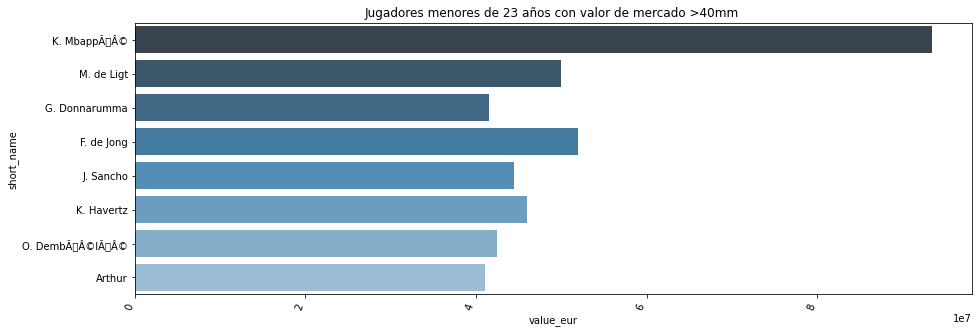

In [72]:
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x="value_eur", y="short_name", data=promesas, ax=ax, palette="Blues_d")
plt.xticks(rotation=70, ha='right')
plt.title("Jugadores menores de 23 años con valor de mercado >40mm ")
plt.show()

### Jugadores con mayor valoración internacional


In [51]:
top_internacional = futbol[futbol["international_reputation"] == 5]
top_internacional

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,player_positions,preferred_foot,international_reputation,release_clause_eur,team_jersey_number,contract_valid_until
sofifa_id,,,,,,,,,,,,,,,
158023,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,"RW, CF, ST",Left,5,195800000.0,10.0,2021.0
20801,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,"ST, LW",Right,5,96500000.0,7.0,2022.0
190871,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,"LW, CAM",Right,5,195200000.0,10.0,2022.0
176580,L. SuÃÂ¡rez,32,182,86,Uruguay,FC Barcelona,89,89,53000000,ST,Right,5,108700000.0,9.0,2021.0
167495,M. Neuer,33,193,92,Germany,FC Bayern MÃÂ¼nchen,88,88,32000000,GK,Right,5,52800000.0,1.0,2021.0
41236,Z. IbrahimoviÃÂ,37,195,95,Sweden,LA Galaxy,85,85,14000000,ST,Right,5,21000000.0,9.0,2019.0


### Top Clausulas de rescision

In [80]:
top_clausula_europa = futbol[futbol["release_clause_eur"] >143000000]
top_clausula_europa

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,player_positions,preferred_foot,international_reputation,release_clause_eur,team_jersey_number,contract_valid_until
sofifa_id,,,,,,,,,,,,,,,
158023,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,"RW, CF, ST",Left,5,195800000.0,10.0,2021.0
190871,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,"LW, CAM",Right,5,195200000.0,10.0,2022.0
200389,J. Oblak,26,188,87,Slovenia,AtlÃÂ©tico Madrid,91,93,77500000,GK,Right,3,164700000.0,13.0,2023.0
183277,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,"LW, CF",Right,4,184500000.0,7.0,2024.0
192985,K. De Bruyne,28,181,70,Belgium,Manchester City,91,91,90000000,"CAM, CM",Right,4,166500000.0,17.0,2023.0
192448,M. ter Stegen,27,187,85,Germany,FC Barcelona,90,93,67500000,GK,Right,3,143400000.0,1.0,2022.0
203376,V. van Dijk,27,193,92,Netherlands,Liverpool,90,91,78000000,CB,Right,3,150200000.0,4.0,2023.0
209331,M. Salah,27,175,71,Egypt,Liverpool,90,90,80500000,"RW, ST",Left,3,148900000.0,11.0,2023.0
231747,K. MbappÃÂ©,20,178,73,France,Paris Saint-Germain,89,95,93500000,"ST, RW",Right,3,191700000.0,7.0,2022.0


/Users/borjadelrio/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/borjadelrio/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0, flags=flags)


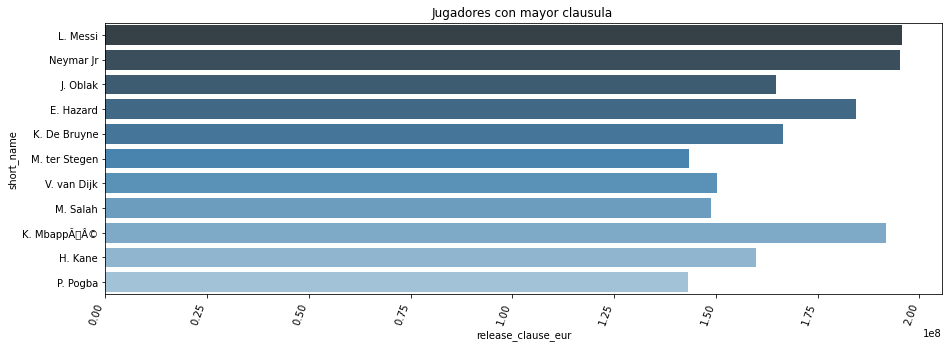

In [81]:
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x="release_clause_eur", y="short_name", data=top_clausula_europa, ax=ax, palette="Blues_d")
plt.xticks(rotation=70, ha='right')
plt.title("Jugadores con mayor clausula ")
plt.show()